dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


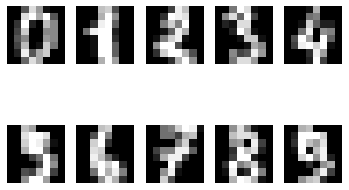

손글씨 분류

[0 1 2 3 4 5 6 7 8 9]



[Decision Tree]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360




[Random Forests]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       0.80      0.48      0.60        42
         

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.96      1.00      0.98        43
           1       0.90      0.90      0.90        42
           2       0.97      0.97      0.97        40
           3       0.89      0.97      0.93        34
           4       0.97      0.97      0.97        37
           5       0.93      1.00      0.97        28
           6       1.00      0.93      0.96        28
           7       0.97      1.00      0.99        33
           8       0.97      0.86      0.91        43
           9       0.94      0.91      0.92        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360




[SGD Classifier]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.86      0.90        42
           2       0.97      0.95      0.96        40
    

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
# 손글씨를 분류해 봅시다

# (1) 필요한 모듈 import하기
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report



# (2) 데이터 준비
digits = load_digits()
#Feature Data 지정하기
digits_data = digits.data


# 여러개의 데이터 확인
import matplotlib.pyplot as plt
%matplotlib inline
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()



# (3) 데이터 이해하기
#Label Data 지정하기
digits_label = digits.target  # 타겟 데이터 확인
print('손글씨 분류\n')
print(digits.target_names)


# (4) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)



# (5) 다양한 모델로 학습시켜보기

# Decision Tree 사용해 보기
print('\n\n\n[Decision Tree]')
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train) # 모델 학습

y_pred = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred))



# Random Forest 사용해 보기
print('\n\n\n[Random Forests]')
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



# SVM 사용해 보기
print('\n\n\n[SVM]')
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



# SGD Classifier 사용해 보기
print('\n\n\n[SGD Classifier]')
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

clf = make_pipeline(StandardScaler(),SGDClassifier(max_iter=1000, tol=1e-3))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))



# Logistic Regression 사용해 보기
print('\n\n\n[Logistic Regression]')
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


1 필기 숫자를 인식하는 프로그램이다. SVM이 다른 알고리즘에 비해 우수한 precision recall을 나타냈다.

2 SVM과 Logistic Regression은 수렴에러가 있다. SVM에서  tol=1e-5 -> tol=1e-3으로 바꿔 기준치를 
완화시켜보았지만 같은 경고메시지가 떴다. 